# Seattle Neighborhood Trends: An Airbnb Data Analysis

## Business understanding for Seattle area neighborhoods

In this jupyter notebook, we analyze some of the driving factors for people to choose a place to stay in the Airbnb platform. We will focus on using data from the Seattle area to answer the following questions 

* What are the most popular neighborhoods and room types in the Seattle area?
* What are the price ranges of Seattle apartments by neighborhoods? What is the average daily rental price per month?
* What is the vibe of each Seattle neighborhood?


## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

## Import the data

In [2]:
df = pd.read_csv('./listings-sea.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
df2 = pd.read_csv('./calendar-sea.csv')
df2.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


# Answering research questions

# Question 1. What are the most popular neighborhoods and room types in the Seattle area?

One way to attempt to understand Seattle a little bit better is by exploring its individual neighborhoods. Let’s first take a look at a histogram that sorts each neighborhood by the most listings

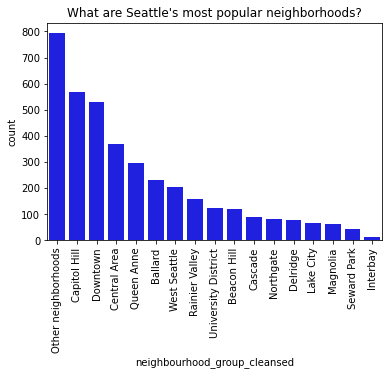

In [4]:
def neighborhood_plot(df): 
    # In this function, we create a bar chart to rank neighborhoods by popularity. 
    nbhd_vals = df.neighbourhood_group_cleansed.value_counts()
    sns.countplot(data = df, x="neighbourhood_group_cleansed", order = nbhd_vals.index, color = 'blue' )
    plt.xticks(rotation = 90);
    plt.title("What are Seattle's most popular neighborhoods?");
neighborhood_plot(df)

From this graphic, it is easy to see that the majority of the listings can be found in Capitol Hill, Downtown, Central Area. These locations are considered to be the most centrally located to the tourism and business corridors of the city.

Another revealing trend might be to look at the types of rentals that are offered by neighborhood. Let’s look at the previous histogram color-coded by rental type

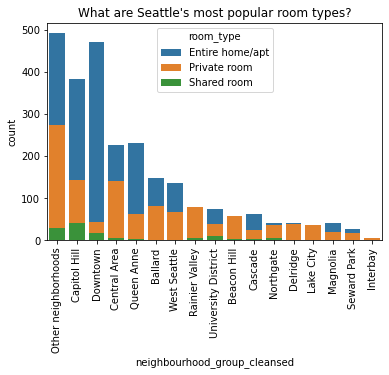

In [5]:
def room_type_plot(df):
    # In this function, we generate a bar chart to rank neighborhoods and break down room types. 
    nbhd_vals = df.neighbourhood_group_cleansed.value_counts()
    sns.countplot(data = df, x="neighbourhood_group_cleansed", hue="room_type", order = nbhd_vals.index, dodge = False)
    plt.xticks(rotation = 90);
    plt.title("What are Seattle's most popular room types?");
room_type_plot(df)

Analysis of this graphic that most rentals in the popular neighborhoods are for entire homes or apartments, while in those neighborhoods away from the most-centrally located parts of town private rooms tend to the norm. It is possible to infer that this is likely a result of rentals being smaller in the central parts of the city while in other districts renters tend to own larger homes and might opt for renting out a private room.

# Question 2. What are the price ranges of Seattle apartments by neighborhoods? What is the average daily rental price per month?

Second, let’s look at what the rental prices might look like for each neighborhood

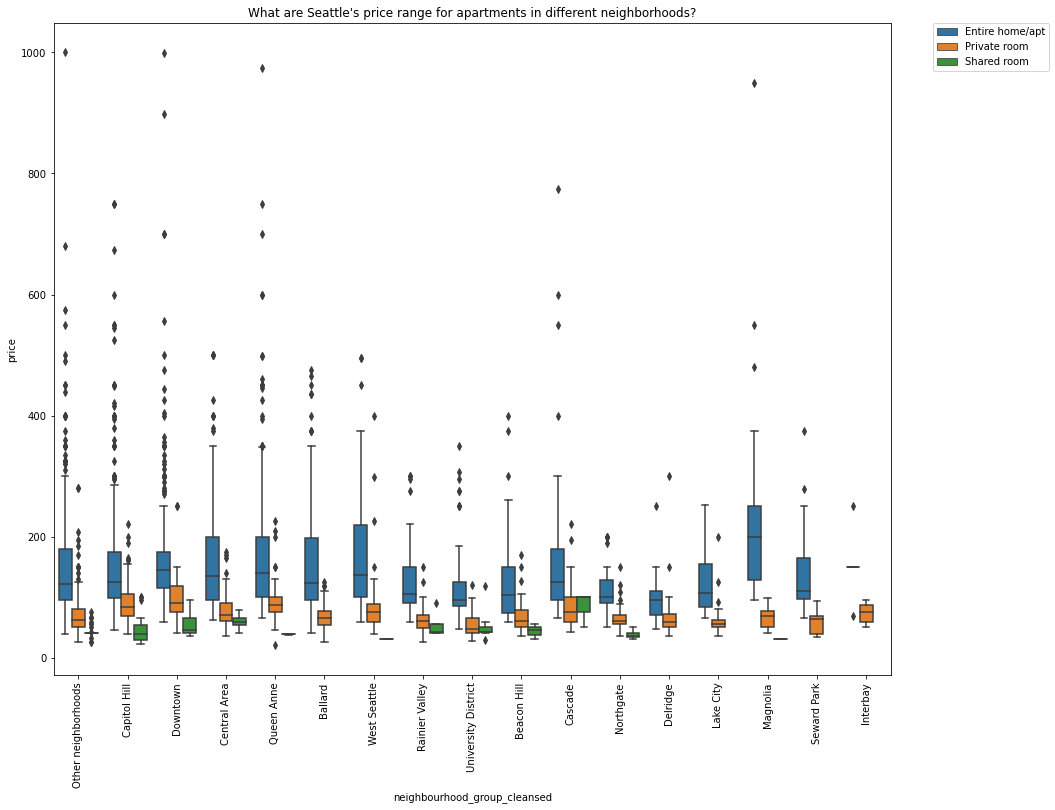

In [6]:
def neighborhood_price_plot(df):
    # In this function, we generate a box plot for Airbnb prices by neighborhood. 
    nbhd_vals = df.neighbourhood_group_cleansed.value_counts()
    df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
    plt.figure(figsize=(15,12))
    sns.boxplot(data = df, x='neighbourhood_group_cleansed', y='price', hue='room_type', order = nbhd_vals.index)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xticks(rotation = 90);
    plt.title("What are Seattle's price range for apartments in different neighborhoods?");
neighborhood_price_plot(df)

Looking at this figure, it is possible to conclude that the centrally located neighborhoods exhibit the largest variation in prices. This could be due to the fact that they vary in amenities; some might be basic rentals, while others will be in luxury buildings. Also worthy of noting that neighborhoods like Cascade and Magnolia tend to have higher priced rentals as well. Generally speaking though, most rentals fall under $200/night, with some exceptions.

For additional perspective, let's look at where each neighborhood is located geographically within the city. 

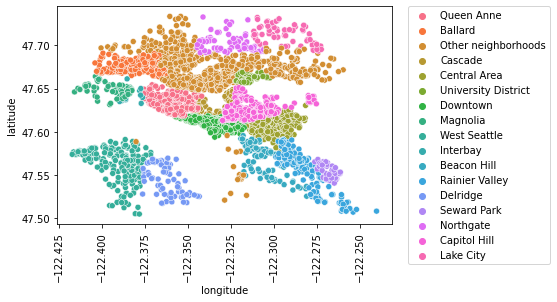

In [7]:
def neighborhood_scatterplot(df):
    # In this function, we create a scatter plot to visualize the geographical location of each neighborhood. 
    sns.scatterplot(data = df ,y = "latitude", x ="longitude", hue='neighbourhood_group_cleansed', palette = "husl")
    plt.xticks(rotation = 90);
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
neighborhood_scatterplot(df)

Looking at this figure, it is possible to conclude that the centrally located neighborhoods exhibit the largest variation in prices. This could be due to the fact that they vary in amenities; some might be basic rentals, while others will be in luxury buildings. Also worthy of noting that neighborhoods like Cascade and Magnolia tend to have higher priced rentals as well. Generally speaking though, most rentals fall under $200/night, with some exceptions.

Now, let’s look at average Seattle-wide prices by month to see if that provides us with another insight.

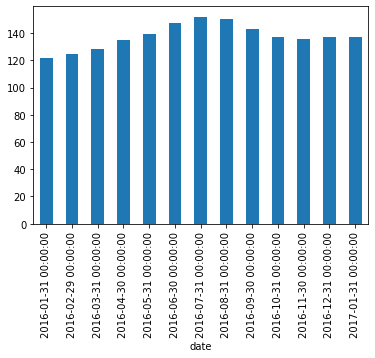

In [8]:
def monthly_price_plot(df):
    # In this function, we create an average price plot broken out by month. 
    df2.date = pd.to_datetime(df2.date)
    df2[df2.columns[-1]] = df2[df2.columns[-1]].replace('[\$,]', '', regex=True).astype(float)
    df2.groupby(pd.Grouper(key='date', freq='1M'))['price'].mean().plot(kind = 'bar');
monthly_price_plot(df2)

Here we obtain evidence that the actual average prices in Seattle are far lower than $200/night, closer to $130/night. We also observe that there appears to be seasonality with rental prices spiking up by about $10-20/night in the summer months.

# Question 3. What is the vibe of each Seattle neighborhood?

Our final analysis of the Seattle data will be centered around understanding what each neighborhood is like by analyzing review data. We create a word cloud that contains popular words that people use when reviewing each neighborhood

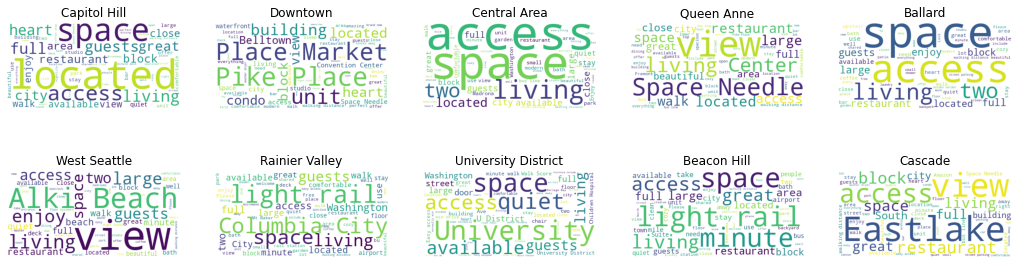

In [9]:
def neighborhood_wordcloud(df, stop_words):
    # In this function, we generate a wordcloud broken down by neighborhoods. 
    nbhd_vals = df.neighbourhood_group_cleansed.value_counts()
    fig, axs = plt.subplots(2,5, figsize=(18, 5), facecolor='w', edgecolor='k')
    axs = axs.ravel()

    for i in range(10):
        df_select = df[df['neighbourhood_group_cleansed'] == nbhd_vals.index[i+1]]
        name = " ".join(str(w) for w in df_select.description)
        wordcloud = WordCloud(background_color='white',max_words=60, stopwords = stop_words).generate(name)
        axs[i].imshow(wordcloud)
        axs[i].set_title(nbhd_vals.index[i+1])
        axs[i].axis('off')
    
stop_words = ['private','guest','neighborhood','bed','one','Ballard','Lake','Union','bathroom','will',"downtown", "kitchen","apartment","West", "Beacon","Queen","Anne","Capitol","Hill", "Seattle", "home", "room",'house','bedroom'] + list(STOPWORDS)
neighborhood_wordcloud(df, stop_words)

Analysis of this word cloud reveals some interesting tidbits of information about each neighborhood. For example, the words “access”, “heart” and “city” show up in many of the reviews for the areas adjacent to downtown, suggesting that this is something that most people who rent in this areas would care about. Similarly, Downtown dwellers point out Pike Place Market as an attraction while Queen Anne folks call out Space Needle. Other terms of interest could be the word “view” for people staying in downtown, Queen Anne and West Seattle, which are neighborhoods that contain dominating views of the city. The word “light rail” appears in Rainier Valley and Beacon Hill, implying easy access to public transportation systems. Finally, the word “restaurant” also happens to appear in many neighborhood reviews, indicating another item of importance for reviewers.

# Summary of Results

Overall, the project concludes that each Seattle neighborhood is fairly unique in terms of the amenities they offer. In general, most listings are private rooms or entire apartments. Also, the average nightly rental price in each of these neighborhoods generally sits within a range of under $150/night.

There appears to be seasonality, with the summer months resulting in higher prices of the rentals. Finally, a word cloud was created to describe the vibe of each neighborhood based on aggregating data from the reviews. The conclusion from this analysis was that different neighborhoods offer a variety of amenities such as location close to downtown, great views and proximity to public transportation.